<a href="https://colab.research.google.com/github/hsiangwei0903/Fine-Grained-Object-Recognition/blob/dev%2Fravi%2Ftent/DenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ravi Sangani**

DenseNet is a type of convolutional neural network that utilises dense connections between layers, through Dense Blocks, where we connect all layers (with matching feature-map sizes) directly with each other. To preserve the feed-forward nature, each layer obtains additional inputs from all preceding layers and passes on its own feature-maps to all subsequent layers.

The DenseNet Blur variant in this collection by Ross Wightman employs Blur Pooling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install timm


Mounted at /content/drive
     |████████████████████████████████| 431 kB 13.8 MB/s 


In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02085620-Chihuahua

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test/n02085620-Chihuahua


## **running inference on single image**

In [ ]:
import timm
import time
model = timm.create_model('densenet121', pretrained=True)
model.eval()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNormAct2d(
          128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (act): ReLU(inplace=True)
        )
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): DenseLayer(
        (norm1): BatchNormAct2d(
          96, eps=1

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}


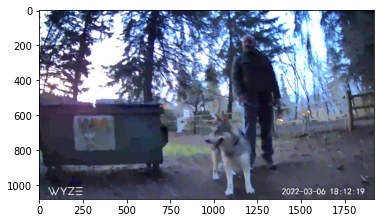

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


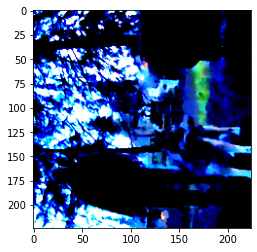

In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

# url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
# urllib.request.urlretrieve(url, filename)
# img = Image.open(filename).convert('RGB')
filename = "husky15.jpg"

img = Image.open(filename).convert('RGB')
read_image = mpimg.imread(filename)
implot = plt.imshow(read_image)
plt.show()

tensor = transform(img).unsqueeze(0) # transform and add batch dimension
plt.imshow(np.transpose(transform(img)))
plt.show()



In [ ]:
import torch
with torch.no_grad():
  out = model(tensor)
probabilities = torch.nn.functional.softmax(out[0], dim=0)
print(probabilities.shape)

torch.Size([1000])


In [ ]:
# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

picture_of = "Italian greyhound"
print([picture_of in categories])
# Print top categories per image
top10_prob, top10_catid = torch.topk(probabilities, 10)
for i in range(top10_prob.size(0)):
    print(categories[top10_catid[i]], top10_prob[i].item())

[True]
malamute 0.35087060928344727
Siberian husky 0.2685803771018982
Eskimo dog 0.16957806050777435
dogsled 0.06525345891714096
Great Pyrenees 0.01526089757680893
Norwegian elkhound 0.014557828195393085
German shepherd 0.009739367291331291
kuvasz 0.004352205898612738
Saint Bernard 0.0023615381214767694
malinois 0.0022933692671358585


In [ ]:
TOTAL_IMAGES_ENTIRE = 0;
TOTAL_CORRECT_ENTIRE = 0;

## **running inferences on all ratterrier/chihuahua images**
-avg latency is calculated here too


In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02085620-Chihuahua

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02085620-Chihuahua


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0
latency_sum = 0
# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "chihuahua"
key_words = ["chihuahua"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))

for filename in os.listdir("."):
  latency_s = time.time()
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    latency_curr_time = (time.time() - latency_s) # find latency end
    latency_sum += latency_curr_time
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      # print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      # print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      # print("\n")
      accurate_prediction_counter += 1
    # else:
    #   print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
    #   print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
average_time = (latency_sum)/total_number_of_images
print("Average latency is " + str(average_time))
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter



{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
chihuahua is a category in ImageNet?: True
Total images: 10
DenseNet121 had a 60.0% accuracy on images in /content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02085620-Chihuahua
Average latency is 0.8853189468383789


## **running inferences on all husky images**

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02110185-Siberian_husky

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02110185-Siberian_husky


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "siberian husky"
key_words = ["husky"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter



{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
siberian husky is a category in ImageNet?: True


siberian husky 0.5080931782722473
n02110185_0.jpg had its actual category in the top 1 prediction with softmax > 0.0


siberian husky 0.5453814268112183
n02110185_1.jpg had its actual category in the top 1 prediction with softmax > 0.0


siberian husky 0.5621984004974365
n02110185_2.jpg had its actual category in the top 1 prediction with softmax > 0.0


eskimo dog 0.5187883973121643
n02110185_3.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


siberian husky 0.25157132744789124
n02110185_4.jpg had its actual category in the top 1 prediction with softmax > 0.0


siberian husky 0.7281521558761597
n02110185_5.jpg had its actual category in the top 1 prediction with softmax > 0.0


eskimo dog 0.3337833285331726
n02110185_6.jpg did not have its actual category in the top 1 

## **running inferences on all labrador images**

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02099712-Labrador_retriever

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02099712-Labrador_retriever


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "labrador retriever"
key_words = ["labrador"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter



{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
labrador retriever is a category in ImageNet?: True


rhodesian ridgeback 0.6451480388641357
n02099712_0.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


labrador retriever 0.1394486427307129
n02099712_1.jpg had its actual category in the top 1 prediction with softmax > 0.0


kelpie 0.23777909576892853
n02099712_2.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


curly-coated retriever 0.5047815442085266
n02099712_3.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


irish setter 0.6908812522888184
n02099712_4.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


golden retriever 0.6123039126396179
n02099712_5.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


kuvasz 0.29561910033226013
n02099712_6.

## **running inferences on all greyhound images**

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02091032-Italian_greyhound

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02091032-Italian_greyhound


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "italian greyhound"
key_words = ["greyhound"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter


{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
italian greyhound is a category in ImageNet?: True


italian greyhound 0.7243775725364685
n02091032_0.jpg had its actual category in the top 1 prediction with softmax > 0.0


italian greyhound 0.9341707825660706
n02091032_1.jpg had its actual category in the top 1 prediction with softmax > 0.0


italian greyhound 0.4715769588947296
n02091032_2.jpg had its actual category in the top 1 prediction with softmax > 0.0


italian greyhound 0.33394044637680054
n02091032_3.jpg had its actual category in the top 1 prediction with softmax > 0.0


italian greyhound 0.8573813438415527
n02091032_4.jpg had its actual category in the top 1 prediction with softmax > 0.0


italian greyhound 0.8476179838180542
n02091032_5.jpg had its actual category in the top 1 prediction with softmax > 0.0


whippet 0.4679386019706726
n02091032_6.jpg did not have its actual category 

## **running inferences on all german sheperd images**

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02106662-German_shepherd

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02106662-German_shepherd


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
print(categories)
picture_of = "german shepherd"
key_words = ["german shepherd"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'european fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'american chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'gila monster', 'green lizard', 'african chameleon', 'komodo dragon', 'african crocodile', 'american alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 

## **running inferences on all malamute images**

In [ ]:
cd /content/drive/MyDrive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02110063-malamute

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02110063-malamute


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "malamute"
key_words = ["malamute"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
malamute is a category in ImageNet?: True


malamute 0.7702674269676208
n02110063_0.jpg had its actual category in the top 1 prediction with softmax > 0.0


malamute 0.5161123275756836
n02110063_1.jpg had its actual category in the top 1 prediction with softmax > 0.0


malamute 0.470245361328125
n02110063_2.jpg had its actual category in the top 1 prediction with softmax > 0.0


malamute 0.6316680908203125
n02110063_3.jpg had its actual category in the top 1 prediction with softmax > 0.0


collie 0.23663532733917236
n02110063_4.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


eskimo dog 0.3001428246498108
n02110063_5.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


siberian husky 0.3891739249229431
n02110063_6.jpg did not have its actual category in the top 1 prediction with softmax > 

### notes

[link text](https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F08%2F10%2Falaskan-malamute-vs-siberian-husky-infographic.png
)

interesting results, the siberian husky is almost identical to malamute


## running inference on all miniature schnauzer images
-avg throughput per 1 min is also calculated here

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02097047-miniature_schnauzer

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02097047-miniature_schnauzer


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "miniature schnauzer"
key_words = ["miniature schnauzer"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

beginning_time = time.time()
for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      # print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      # print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      # print("\n")
      accurate_prediction_counter += 1
    # else:
    #   print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
    #   print("\n")
ending_time = time.time()
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
print(str(total_number_of_images) + " took this long: " + str(ending_time - beginning_time))
minute_throughput = (60 * total_number_of_images) / (ending_time - beginning_time)
print ("Minute throughpout: " + str(minute_throughput))
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
miniature schnauzer is a category in ImageNet?: True


Total images: 10
DenseNet121 had a 40.0% accuracy on images in /content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02097047-miniature_schnauzer
10 took this long: 8.806845664978027
Minute throughpout: 68.12881965060494


## running inference on all Doberman images

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02107142-Doberman

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02107142-Doberman


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "doberman"
key_words = ["doberman"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
doberman is a category in ImageNet?: True


doberman 0.4646333158016205
n02107142_0.jpg had its actual category in the top 1 prediction with softmax > 0.0


vizsla 0.2016117125749588
n02107142_1.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


doberman 0.7285133004188538
n02107142_2.jpg had its actual category in the top 1 prediction with softmax > 0.0


doberman 0.4035308361053467
n02107142_3.jpg had its actual category in the top 1 prediction with softmax > 0.0


doberman 0.5111252069473267
n02107142_4.jpg had its actual category in the top 1 prediction with softmax > 0.0


vizsla 0.2996804714202881
n02107142_5.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


doberman 0.4963994026184082
n02107142_6.jpg had its actual category in the top 1 prediction with softmax > 0.0


doberman 0.69

## running inference on all american staffordshire terrier images

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02093428-American_Staffordshire_terrier

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02093428-American_Staffordshire_terrier


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "terrier"
key_words = ["terrier"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
terrier is a category in ImageNet?: False


television 0.5299442410469055
n02093428_0.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


staffordshire bullterrier 0.5132147073745728
n02093428_1.jpg had its actual category in the top 1 prediction with softmax > 0.0


american staffordshire terrier 0.7713707089424133
n02093428_2.jpg had its actual category in the top 1 prediction with softmax > 0.0


american staffordshire terrier 0.8838157057762146
n02093428_3.jpg had its actual category in the top 1 prediction with softmax > 0.0


Total images: 4
DenseNet121 had a 75.0% accuracy on images in /content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02093428-American_Staffordshire_terrier


## running inference on all standard poodle images

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/test_yt/n02113799-standard_poodle

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/test_yt/n02113799-standard_poodle


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "standard poodle"
key_words = ["poodle"]
softmax_accuracy_threshold = 0.0
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 1)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 1 prediction with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("Total images: " + str(total_number_of_images))
print("DenseNet121 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())
TOTAL_IMAGES_ENTIRE += total_number_of_images
TOTAL_CORRECT_ENTIRE += accurate_prediction_counter

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875}
standard poodle is a category in ImageNet?: True


standard poodle 0.28236648440361023
n02113799_0.jpg had its actual category in the top 1 prediction with softmax > 0.0


irish water spaniel 0.18276581168174744
n02113799_1.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


toy poodle 0.523697555065155
n02113799_2.jpg had its actual category in the top 1 prediction with softmax > 0.0


bedlington terrier 0.5896265506744385
n02113799_3.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


irish water spaniel 0.3536335527896881
n02113799_4.jpg did not have its actual category in the top 1 prediction with softmax > 0.0


standard poodle 0.20019978284835815
n02113799_5.jpg had its actual category in the top 1 prediction with softmax > 0.0


standard poodle 0.4977075457572937
n02113799_6.jpg had i

In [ ]:
print("accuracy is " + str(TOTAL_CORRECT_ENTIRE/TOTAL_IMAGES_ENTIRE))
print("latency is: " + str(average_time))
print("throughput per 60s is " + str(minute_throughput))

accuracy is 0.6022727272727273
latency is: 0.8853189468383789
throughput per 60s is 68.12881965060494
